# Machine Learning and Deep Learning Summer Internship Assignment 10

## ID: SIRSS1040

## Name: Sailesh Nair

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type\
Value 1: typical angina\
Value 2: atypical angina\
Value 3: non-anginal pain\
Value 4: asymptomatic\

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results\
Value 0: normal\
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
# data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
data = pd.read_csv('./dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True) # dropping duplicated rows
data.reset_index(drop=True, inplace=True)
data.shape

(302, 14)

<AxesSubplot:>

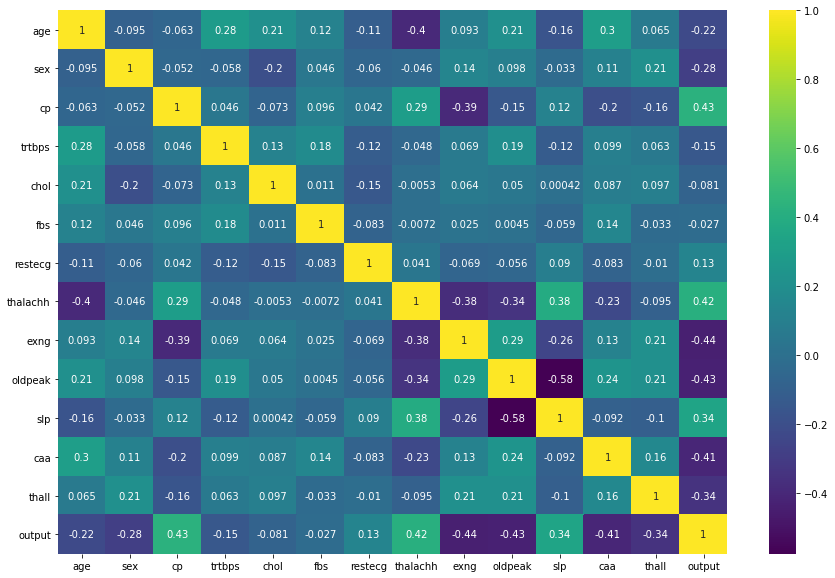

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
numerical= ['age', 'trtbps', 'chol',  'thalachh', 'oldpeak']
categorical= ['sex','cp','fbs','restecg','exng', 'slp', 'caa', 'thall']
                

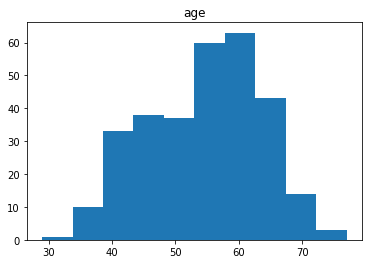

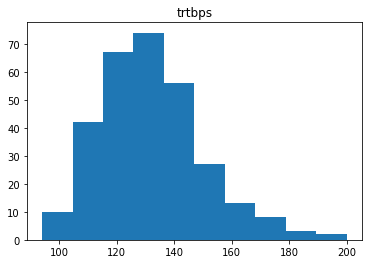

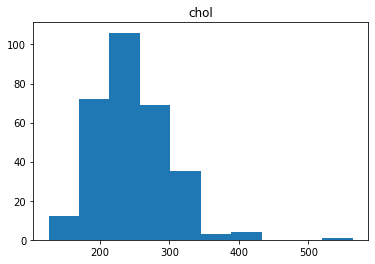

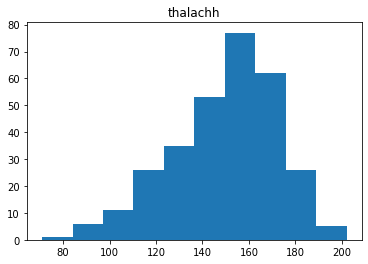

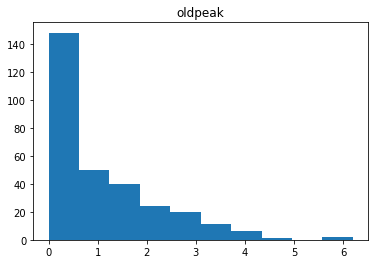

In [12]:
for col in numerical:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

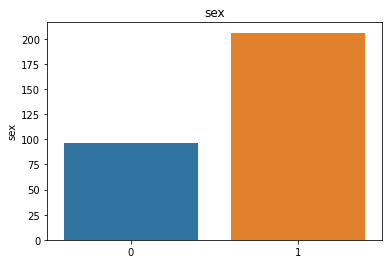

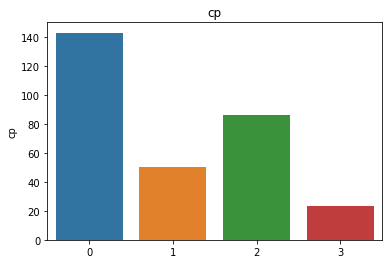

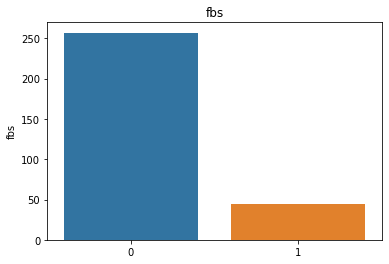

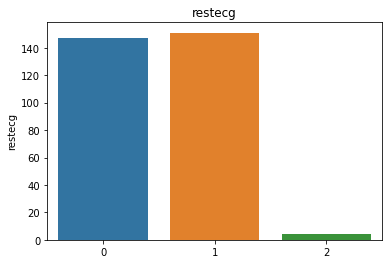

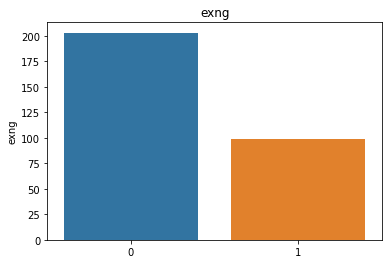

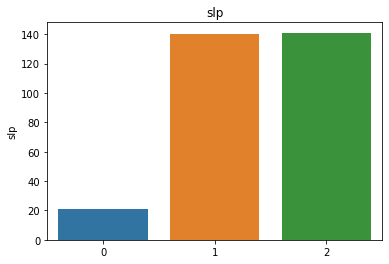

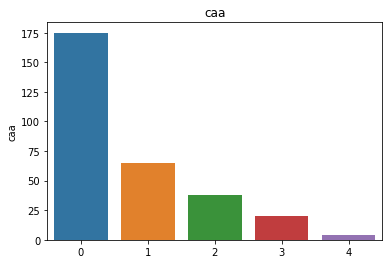

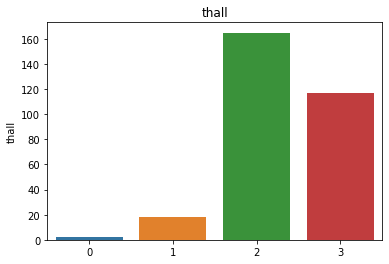

In [13]:
for col in categorical:
    sns.barplot(data[col].value_counts().index,data[col].value_counts()).set_title(col)
    plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

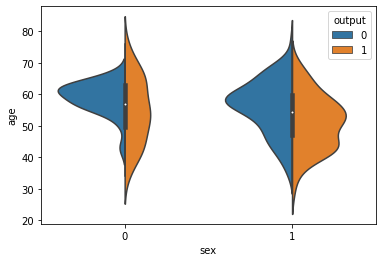

In [14]:
sns.violinplot("sex","age", hue="output", data=data,split=True)

In [15]:
for col in categorical:
    print(pd.pivot_table(data,index='output',columns= col, values='age'))

sex             0          1
output                      
0       59.041667  56.087719
1       54.555556  51.043478
cp              0          1          2          3
output                                            
0       56.298077  57.444444  58.500000  55.142857
1       54.076923  50.024390  52.426471  56.187500
fbs             0          1
output                      
0       56.362069  57.863636
1       52.000000  56.173913
restecg          0          1     2
output                             
0        57.291139  55.660714  56.0
1        53.823529  51.452632  76.0
exng            0          1
output                      
0       57.048387  56.236842
1       52.418440  53.608696
slp             0          1          2
output                                 
0       57.250000  57.000000  55.342857
1       52.888889  54.428571  51.707547
caa             0          1          2          3          4
output                                                       
0       52.577778  5

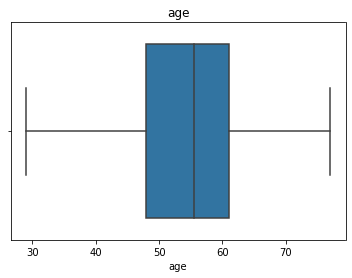

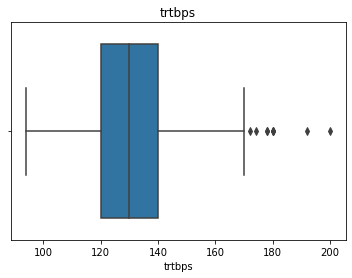

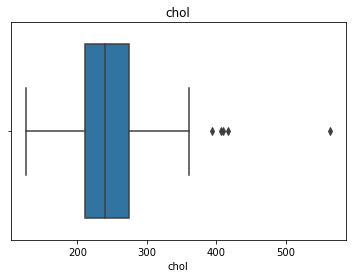

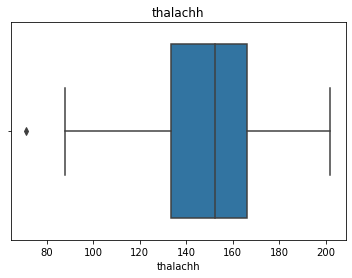

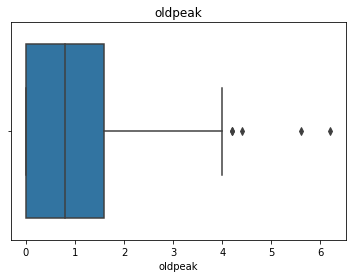

In [16]:
for col in numerical:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

#### function to get the upper and lower bounds

In [17]:
def getbounds(col):
    sorted(col)
    q1,q3 = np.percentile(col,[25,75]) # quartailes
    iqr = q3-q1 # inter quartile range
    lb = q1 -(1.5*iqr) # lower bound
    ub = q3 +(1.5*iqr) # upper bound
    return lb,ub

In [18]:
trtbps_lb,trtbps_ub = getbounds(data['trtbps'])
chol_lb,chol_ub = getbounds(data['chol'])
oldpeak_lb,oldpeak_ub = getbounds(data['oldpeak'])
thalachh_lb,thalachh_ub=getbounds(data['thalachh'])

#### Removing outliers < we are setting the outlier values at the bounds

In [19]:
data.loc[data['trtbps']>=trtbps_ub,'trtbps']=trtbps_ub
data.loc[data['chol']>=chol_ub,'chol']=chol_ub
data.loc[data['oldpeak']>=oldpeak_ub,'oldpeak']=oldpeak_ub
data.loc[data['thalachh']<=thalachh_lb,'thalachh']=thalachh_lb

In [20]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(x.shape,y.shape)

(302, 13) (302,)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


### Scaling

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
print("Training Score: ",logreg.score(x_train,y_train))
print("Test Score: ",logreg.score(x_test,y_test))

Training Score:  0.8506224066390041
Test Score:  0.8688524590163934


In [24]:
y_pred = logreg.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score 
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

Confusion matrix:
 [[22  5]
 [ 3 31]]
 f1 score:  0.8857142857142858 

 precision score:  0.8611111111111112 

 recall score:  0.9117647058823529 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

